In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.gmm import GMM

normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49666, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49666):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

components 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.99      0.68      2166
       Relay       0.90      0.09      0.16      2166

    accuracy                           0.54      4332
   macro avg       0.71      0.54      0.42      4332
weighted avg       0.71      0.54      0.42      4332



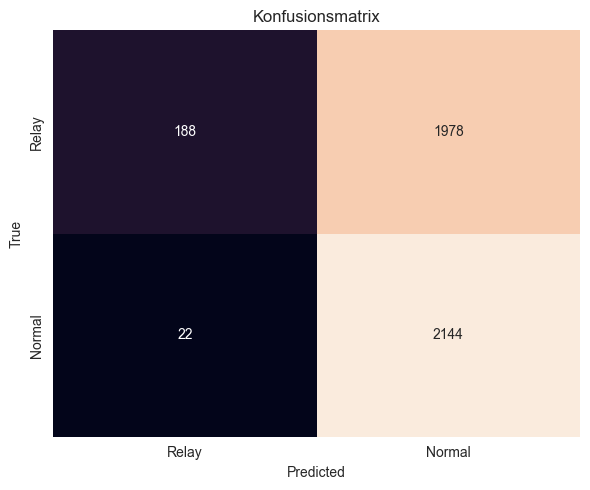

components 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2166
       Relay       0.91      0.11      0.19      2166

    accuracy                           0.55      4332
   macro avg       0.72      0.55      0.44      4332
weighted avg       0.72      0.55      0.44      4332



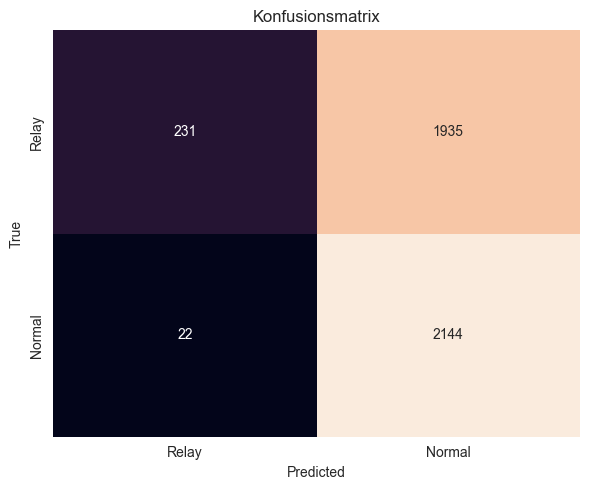

components 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.99      0.69      2166
       Relay       0.90      0.10      0.19      2166

    accuracy                           0.55      4332
   macro avg       0.71      0.55      0.44      4332
weighted avg       0.71      0.55      0.44      4332



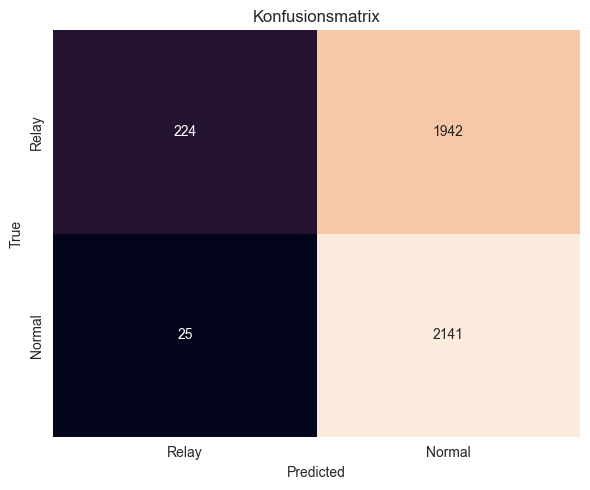

components 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.98      0.71      2166
       Relay       0.91      0.21      0.34      2166

    accuracy                           0.60      4332
   macro avg       0.73      0.60      0.53      4332
weighted avg       0.73      0.60      0.53      4332



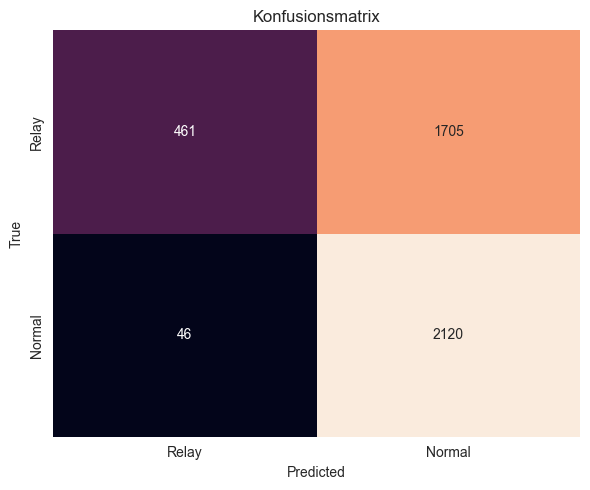

In [2]:
for n in {1,5,10,30}:
    clf = GMM(contamination=0.01, n_components=n)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"components {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

components 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.98      0.72      2166
       Relay       0.92      0.27      0.42      2166

    accuracy                           0.62      4332
   macro avg       0.75      0.62      0.57      4332
weighted avg       0.75      0.62      0.57      4332



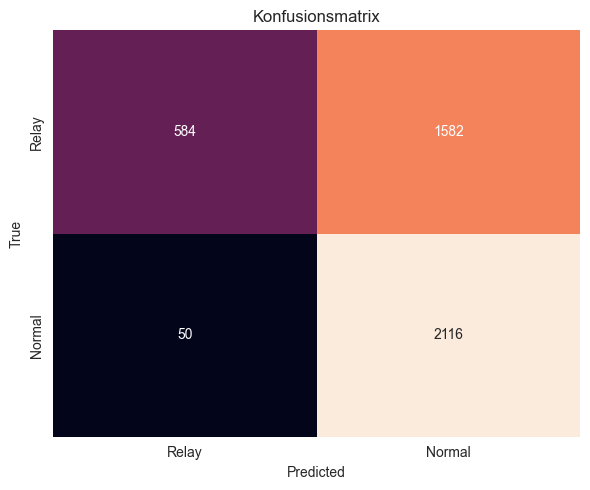

components 90

Classification Report:
               precision    recall  f1-score   support

      Normal       0.60      0.92      0.73      2166
       Relay       0.83      0.39      0.53      2166

    accuracy                           0.66      4332
   macro avg       0.71      0.66      0.63      4332
weighted avg       0.71      0.66      0.63      4332



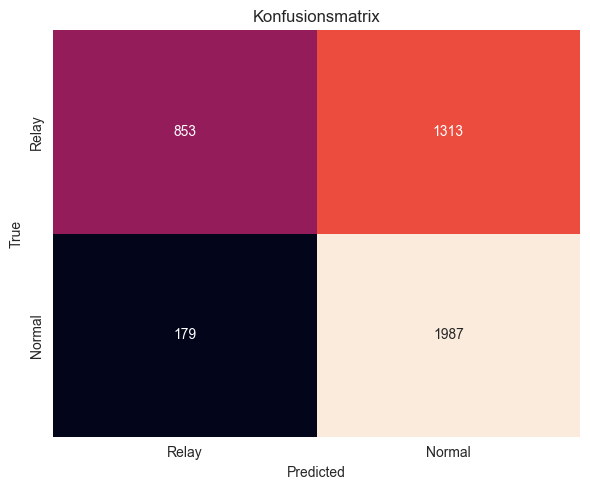

components 70

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.95      0.74      2166
       Relay       0.88      0.38      0.54      2166

    accuracy                           0.67      4332
   macro avg       0.74      0.67      0.64      4332
weighted avg       0.74      0.67      0.64      4332



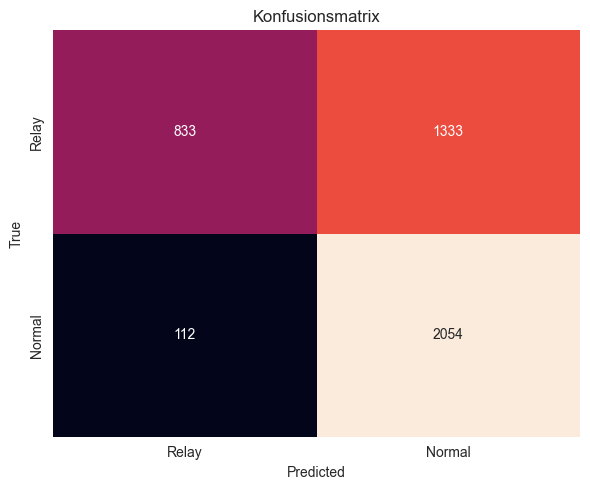

components 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.98      0.71      2166
       Relay       0.92      0.24      0.38      2166

    accuracy                           0.61      4332
   macro avg       0.74      0.61      0.54      4332
weighted avg       0.74      0.61      0.54      4332



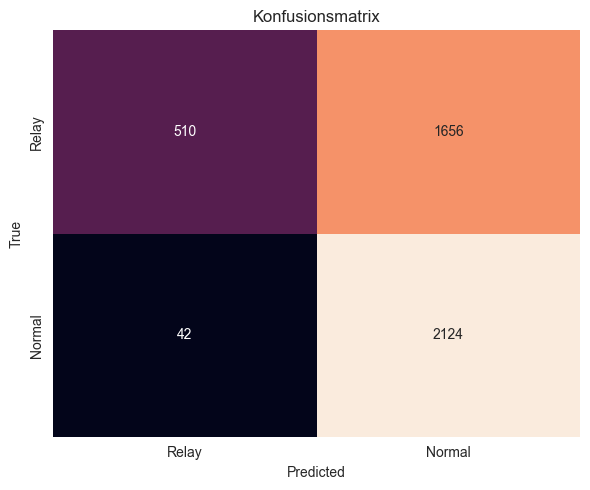

In [5]:
for n in {30, 50, 70, 90}:
    clf = GMM(contamination=0.01, n_components=n)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"components {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

components 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.99      0.68      2166
       Relay       0.90      0.09      0.16      2166

    accuracy                           0.54      4332
   macro avg       0.71      0.54      0.42      4332
weighted avg       0.71      0.54      0.42      4332



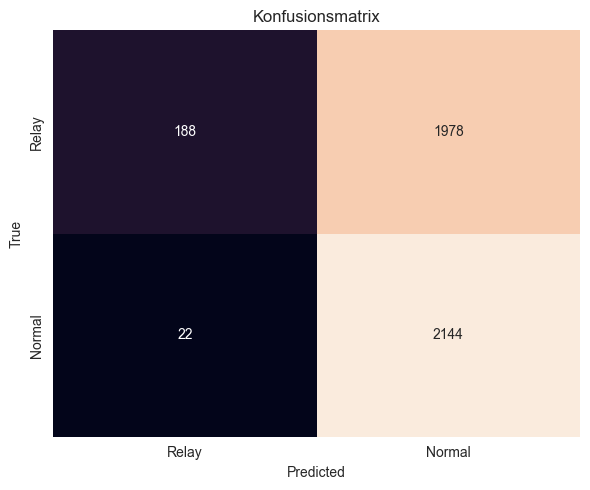

components 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.98      0.69      2166
       Relay       0.87      0.12      0.22      2166

    accuracy                           0.55      4332
   macro avg       0.70      0.55      0.45      4332
weighted avg       0.70      0.55      0.45      4332



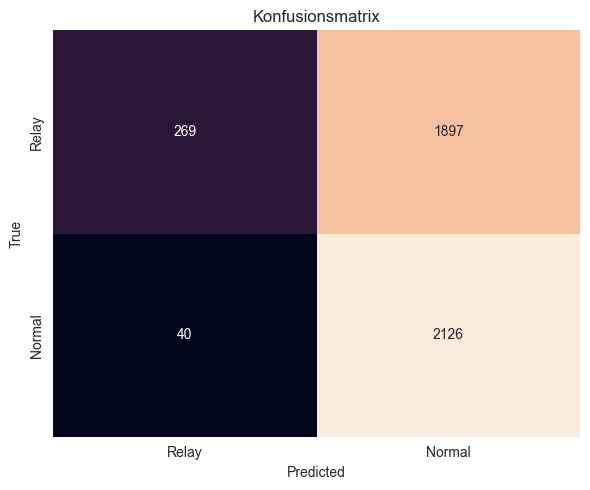

components 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2166
       Relay       0.91      0.11      0.19      2166

    accuracy                           0.55      4332
   macro avg       0.72      0.55      0.44      4332
weighted avg       0.72      0.55      0.44      4332



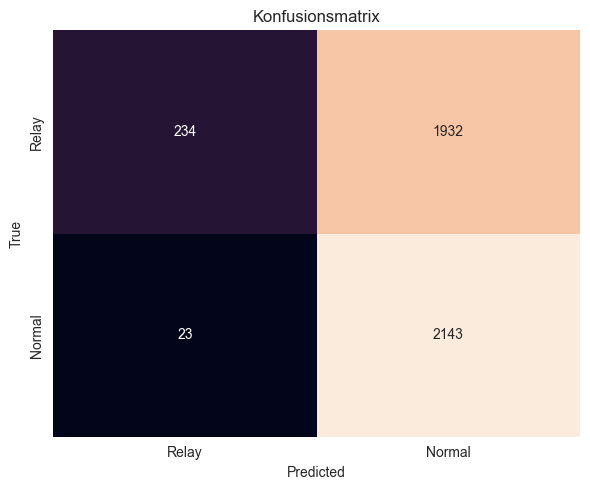

components 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.97      0.70      2166
       Relay       0.88      0.20      0.32      2166

    accuracy                           0.59      4332
   macro avg       0.71      0.59      0.51      4332
weighted avg       0.71      0.59      0.51      4332



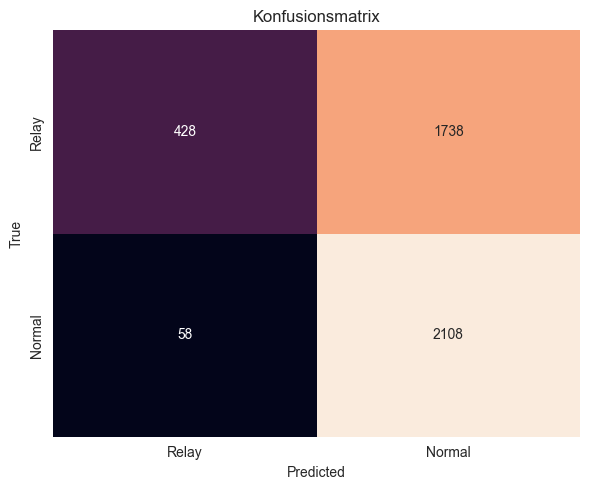

In [3]:
for n in {1,5,10,30}:
    clf = GMM(contamination=0.01, n_components=n)
    clf.fit(X_train_scaled_standard)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_standard)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"components {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

components 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.99      0.68      2166
       Relay       0.90      0.09      0.16      2166

    accuracy                           0.54      4332
   macro avg       0.71      0.54      0.42      4332
weighted avg       0.71      0.54      0.42      4332



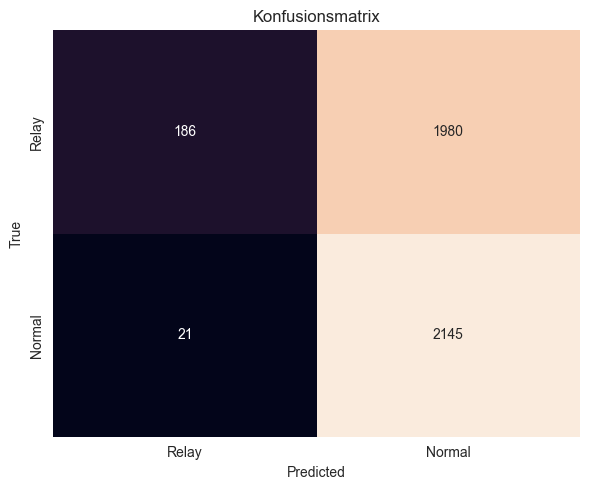

components 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2166
       Relay       0.89      0.11      0.20      2166

    accuracy                           0.55      4332
   macro avg       0.71      0.55      0.45      4332
weighted avg       0.71      0.55      0.45      4332



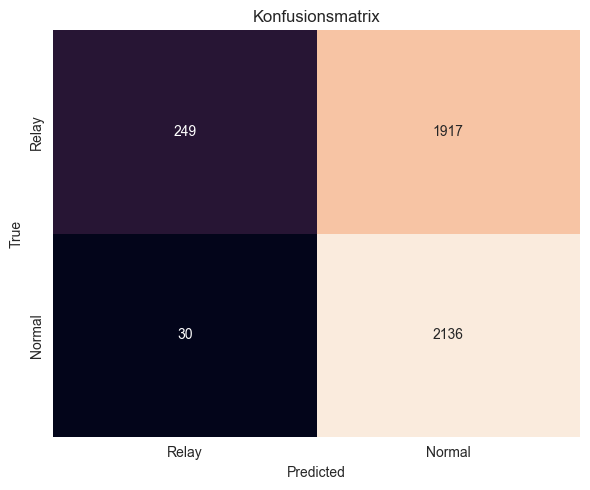

components 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2166
       Relay       0.91      0.11      0.19      2166

    accuracy                           0.55      4332
   macro avg       0.72      0.55      0.44      4332
weighted avg       0.72      0.55      0.44      4332



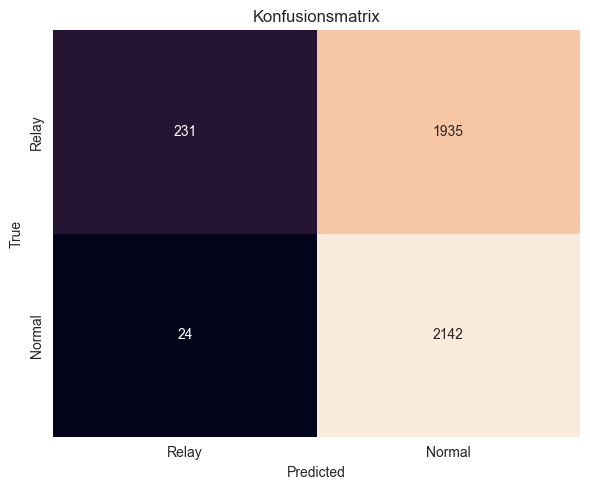

KeyboardInterrupt: 

In [4]:
for n in {1,5,10,30}:
    clf = GMM(contamination=0.01, n_components=n)
    clf.fit(X_train_scaled_minmax)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_minmax)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"components {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()